## End member mixing analysis (EMMA) to determine streamflow source contributions

### Conservative tracers are vital for a successful application of EMMA.​

#### Hooper (2003) suggested that assumptions of linearity of mixing and conservative behavior of tracers can be evaluated using bivariate scatter plots and residual derived from the selected model.

#### Here we take the solute data from our streamsites and make solute-solute plots. Data include:
- ICP-OES (Al, Ca, Cu, Fe, K, Mg, Mn, Na,P,Zn,Si
- IC and total elemental analyser data (Cl, SO4, NO3, PO4, TOC, DIN)
- Stable isotopes (dD, d18O)

Data are from the BREE OneDrive directory (Watershed Data>1_Projects>EMMA>Working file for MATLAB 2023)

- For HB 2022 timeseries, 17 parameters total

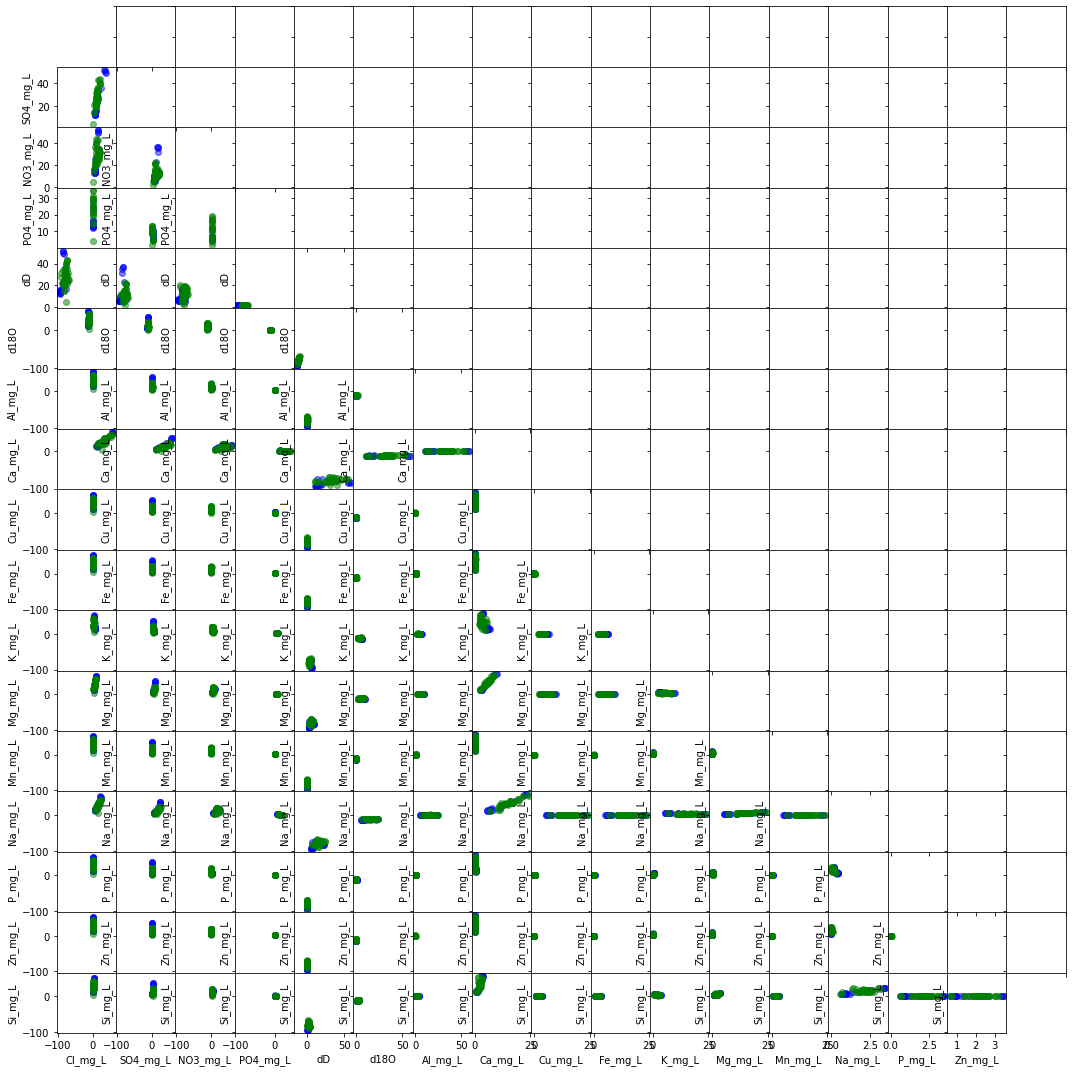

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Load the data from the CSV file
data = pd.read_csv("/home/millieginty/Documents/git-repos/EMMA/data/Data_for_EMMA_2022_HB.csv")

# Get the list of solutes from the headers starting from the 6th column
solutes = list(data.columns[5:])


# Map months to seasons
season_colors = {
    1: "b",  # Blue for winter
    2: "b",
    3: "g",  # Green for spring
    4: "g",
    5: "g",
    6: "r",  # Red for summer
    7: "r",
    8: "r",
    9: "#8B4513",  # Brown for fall
    10: "#8B4513",
    11: "b",  # Blue for winter
    12: "b"
}

# Convert the "Date" column to datetime
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%y", errors="coerce")

# Extract month from the "Date" column
data["Month"] = data["Date"].dt.month

# Create bivariate plots for all combinations of solutes
combinations_list = list(combinations(solutes, 2))

# Set up subplots in a lower triangular grid
num_params = len(solutes)
fig, axes = plt.subplots(num_params, num_params, figsize=(15, 15), sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})

# Plot each bivariate combination in the lower triangular grid
for i, solute1 in enumerate(solutes):
    for j, solute2 in enumerate(solutes):
        if i >= j:  # Only create plots for the lower triangular part
            ax = axes[i, j]

            if i == j:
                ax.axis('off')  # Turn off axes for diagonal plots
            else:
                # Use a scatter plot with colored markers based on the season
                for season, color in season_colors.items():
                    season_data = data[data["Month"].between(season, season, inclusive="both")]
                    ax.scatter(
                        season_data[solute1], season_data[solute2],
                        alpha=0.5, label=f"Season {season}", c=color
                    )

                # Set labels and title
                ax.set_xlabel(solute2)
                ax.set_ylabel(solute1)
        else:
            # Set face color to white for the axes where there are no plots
            ax.axis('off')
            ax.set_facecolor('white')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()